<a href="https://colab.research.google.com/github/BumaranChe/Unsupervised_compare_with_supervised_dataset_Sleep_Disorder_dataset/blob/main/K_Means_Clustering(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML

- a type of ML where the model is trained on data without `explicit labels`.
- Unlike supervised ML, where the algorithms learns from labeled data (input-output pairs), unsupervised ML deals with unlabeled data
- aim is to `find hidden patterns, relationships within`.

Example Workflow:

1. `Data Preprocessing`: Clean and normalize the data.
2. `Choose an Algorithm`: Select a clustering or dimensionality reduction technique.
3. `Train the Model`: Fit the model to the data.
4. `Evaluate`: Use metrics like silhouette score (for clustering) or reconstruction error (for autoencoders) to assess performance.
5. `Interpret Results`: Analyze the clusters, reduced dimensions, or discovered patterns.

In [ ]:
# Businness Problems

# Supervised ML (Regression)
# 1. Sales Forecasting
# 2. House Price Prediction
# 3. Employee Salary Prediction
# 4. Energy Consumption Prediction

# Supervised ML (Classification)
# 1. Spam Detection
# 2. Credit Scoring
# 3. Disease Diagnosis

# Unsupervised ML --> find hidden patterns (cluster)
# 1. Customer Segmentation (group customers based on purchasing behaviour)
# 2. Product Recommendation
# 3. Fraud Detection

#Example 1 : Identifying the productivity of the developer

# 1.0 Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris#Iris dataset is a dataset of flowers
from sklearn.preprocessing import StandardScaler#Based on our theory , we are using distance calculation to find the cluster.
import seaborn as sns#For visualization

In [5]:
df = pd.read_csv("/content/drive/MyDrive/AI Developer Productivity - Sheet1.csv")

In [ ]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,5.99,600,1,5.8,2,1,0.71,5.4
1,4.72,568,2,6.9,5,3,1.75,4.7
2,6.30,560,1,8.9,2,0,2.27,2.2
3,8.05,600,7,6.3,9,5,1.40,5.9
4,4.53,421,6,6.9,4,0,1.26,6.3


#2.0 Scale the data

In [ ]:
X = df

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 5.00898350e-01,  9.62131748e-01, -1.17848421e+00, ...,
         1.28886769e-01, -7.38535004e-01,  4.83023123e-01],
       [-1.51955616e-01,  7.37084850e-01, -5.82085316e-01, ...,
         1.94419338e+00,  2.20457660e-01,  1.08088341e-01],
       [ 6.60256405e-01,  6.80823126e-01, -1.17848421e+00, ...,
        -7.78766535e-01,  6.99953992e-01, -1.23096445e+00],
       ...,
       [-2.03361440e-01,  2.16663900e-01,  6.10712463e-01, ...,
        -7.78766535e-01, -1.01516750e+00,  9.64118010e-04],
       [-9.07621230e-01, -1.17581378e+00,  1.80351024e+00, ...,
        -7.78766535e-01,  8.37274364e-03,  9.65082128e-01],
       [-1.43196064e+00, -1.48525326e+00,  6.10712463e-01, ...,
        -7.78766535e-01, -4.25018172e-01, -1.01671600e+00]])

In [ ]:
df.columns

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load'],
      dtype='object')

In [ ]:
df_scaled = pd.DataFrame(X_scaled,columns= df.columns)

In [ ]:
df_scaled

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,0.500898,0.962132,-1.178484,-0.808383,-0.965110,0.128887,-0.738535,0.483023
1,-0.151956,0.737085,-0.582085,-0.052114,0.145063,1.944193,0.220458,0.108088
2,0.660256,0.680823,-1.178484,1.322921,-0.965110,-0.778767,0.699954,-1.230964
3,1.559858,0.962132,2.399909,-0.464624,1.625292,3.759500,-0.102280,0.750834
4,-0.249627,-0.296724,1.803510,-0.052114,-0.224995,-0.778767,-0.231375,0.965082
...,...,...,...,...,...,...,...,...
495,0.547164,0.919935,-1.178484,-1.152142,-0.595052,-0.778767,-0.554113,1.232893
496,-1.072120,-0.571000,-0.582085,-0.189617,-0.595052,1.036540,-0.120722,0.750834
497,-0.203361,0.216664,0.610712,0.360397,-0.965110,-0.778767,-1.015168,0.000964
498,-0.907621,-1.175814,1.803510,-0.052114,-1.335167,-0.778767,0.008373,0.965082


# 3.0 Calculate WCSS for different number of clusters

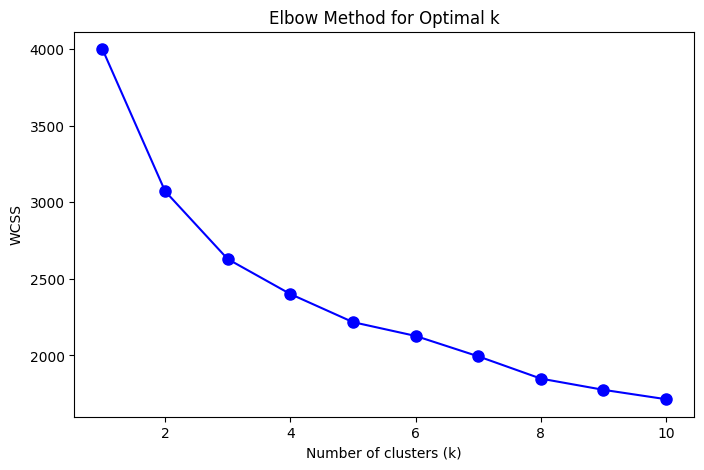

In [ ]:

wcss = []
k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# From the elbow method, let's assume that the optimal number of clusters which is 3  meaning there might be 3 species in the dataset

# Even though we know there are 3 species, the elbow method can confirm that
# k = 3 is indeed a reasonable choice based on the data's structure.

In [ ]:
#Based on the elbow diagram we know the optimal number of k = 2

#4.0 Implement k-means clustering

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

#5.0 Extract the labels

In [ ]:
labels = kmeans.labels_#To get the label

In [ ]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [ ]:
df['Task_Success'] = labels

In [ ]:
df.head(30)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,Task_Success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,1
4,4.53,421,6,6.9,4,0,1.26,6.3,0
5,4.53,429,1,7.1,5,0,3.06,3.9,1
6,8.16,600,1,8.3,6,0,0.30,2.2,1
7,6.53,600,4,3.6,9,3,1.47,9.1,1
8,4.06,409,5,6.1,6,2,2.43,7.0,1
9,6.09,567,5,7.3,7,0,2.11,5.1,1


#Now we compare with the accual label based on the labeled dataset.

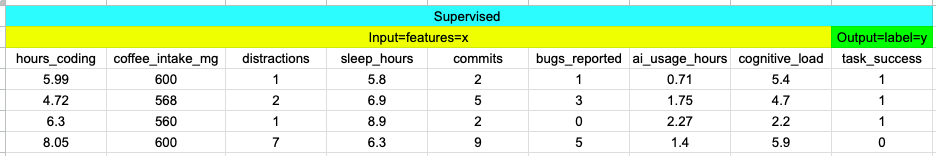

#Assignment: Implement K-Means Clustering Using the following unsupervised data:https://docs.google.com/spreadsheets/d/1wAbm3ieoSDIlMxwSec8FzN6PIVCsoJmkE2S2GOIkw1U/edit?usp=sharing

#Compare the label with the accual label base on this dataset: https://drive.google.com/file/d/1JWm8rhLZUAGXaSBtFcD-K8R-ION6r2x0/view?usp=sharing

# **Indentify if the person have sleep disorder or not**

# 1.0 Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris#Iris dataset is a dataset of flowers
from sklearn.preprocessing import StandardScaler#Based on our theory , we are using distance calculation to find the cluster.
import seaborn as sns#For visualization

df = pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset_Unsupervised Data - Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


# **2.0 Organize the data, convert string into numerical values**

In [ ]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
def pressure(Blood_Pressure):
  try:
    Blood_Pressure = Blood_Pressure.strip()

    diastolic,systolic = (Blood_Pressure.split('/')+[Blood_Pressure])[:2]

    return float(diastolic.strip()),float(systolic.strip())
  except (ValueError,AttributeError):#If there is an error in the dataset , we add none value inside the cell
    return None,None

#Create a new column, apply the function

df[['Systolic_Pressure', 'Diastolic_Pressure']] = df['Blood Pressure'].apply(lambda x: pd.Series(pressure(x)))

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,140.0,95.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0


In [ ]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [ ]:
Occupation_map={
    "Software Engineer": 0,
    "Doctor": 1,
    "Sales Representative": 2,
    "Teacher": 3,
    "Nurse": 4,
    "Engineer": 5,
    "Accountant": 6,
    "Scientist": 7,
    "Lawyer": 8,
    "Salesperson": 9,
    "Manager": 10
}
df['Occupation']=df['Occupation'].map(Occupation_map)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,Male,27,0,6.1,6,42,6,Overweight,126/83,77,4200,126.0,83.0
1,2,Male,28,1,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0
2,3,Male,28,1,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0
3,4,Male,28,2,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0
4,5,Male,28,2,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,4,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0
370,371,Female,59,4,8.0,9,75,3,Overweight,140/95,68,7000,140.0,95.0
371,372,Female,59,4,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0
372,373,Female,59,4,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0


In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
BMI_map={
    "Overweight": 0,
    "Normal": 1,
    "Obese": 2,
    "Normal Weight": 3
}
df['BMI Category']=df['BMI Category'].map(BMI_map)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,Male,27,0,6.1,6,42,6,0,126/83,77,4200,126.0,83.0
1,2,Male,28,1,6.2,6,60,8,1,125/80,75,10000,125.0,80.0
2,3,Male,28,1,6.2,6,60,8,1,125/80,75,10000,125.0,80.0
3,4,Male,28,2,5.9,4,30,8,2,140/90,85,3000,140.0,90.0
4,5,Male,28,2,5.9,4,30,8,2,140/90,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,4,8.1,9,75,3,0,140/95,68,7000,140.0,95.0
370,371,Female,59,4,8.0,9,75,3,0,140/95,68,7000,140.0,95.0
371,372,Female,59,4,8.1,9,75,3,0,140/95,68,7000,140.0,95.0
372,373,Female,59,4,8.1,9,75,3,0,140/95,68,7000,140.0,95.0


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
Gender_map={
    "Male": 0,
    "Female": 1
}
df['Gender']=df['Gender'].map(Gender_map)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,0,27,0,6.1,6,42,6,0,126/83,77,4200,126.0,83.0
1,2,0,28,1,6.2,6,60,8,1,125/80,75,10000,125.0,80.0
2,3,0,28,1,6.2,6,60,8,1,125/80,75,10000,125.0,80.0
3,4,0,28,2,5.9,4,30,8,2,140/90,85,3000,140.0,90.0
4,5,0,28,2,5.9,4,30,8,2,140/90,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,140/95,68,7000,140.0,95.0
370,371,1,59,4,8.0,9,75,3,0,140/95,68,7000,140.0,95.0
371,372,1,59,4,8.1,9,75,3,0,140/95,68,7000,140.0,95.0
372,373,1,59,4,8.1,9,75,3,0,140/95,68,7000,140.0,95.0


# 3.0 Check if there's any empty field in the dataset

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
#df = df.drop(columns=['Blood Pressure','Person ID'])
df = df.drop(columns=['Blood Pressure'])

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0
1,2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
2,3,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
3,4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
4,5,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
370,371,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0
371,372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
372,373,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0


# 4.0 Feature selection using Laplacian Score

# **Feature selection (Laplacian Score)**

In [ ]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
X=df.copy()
X_np=X.values if isinstance(X,pd.DataFrame) else X #checks if X is a Pandas DataFrame and converts it into Numpy array, otherwise return X

scaler=StandardScaler()
X_scaled_for_feature_selection=scaler.fit_transform(X_np) # scale the data
#X_copy=X_scaled.copy()

In [ ]:
X_scaled_for_feature_selection

array([[-1.72742583, -0.9893614 , -1.75309569, ..., -1.61958404,
        -0.33000229, -0.26810236],
       [-1.71816349, -0.9893614 , -1.63764266, ...,  1.97007745,
        -0.45923879, -0.7556402 ],
       [-1.70890116, -0.9893614 , -1.63764266, ...,  1.97007745,
        -0.45923879, -0.7556402 ],
       ...,
       [ 1.70890116,  1.010753  ,  1.94140144, ...,  0.11335599,
         1.47930869,  1.68204901],
       [ 1.71816349,  1.010753  ,  1.94140144, ...,  0.11335599,
         1.47930869,  1.68204901],
       [ 1.72742583,  1.010753  ,  1.94140144, ...,  0.11335599,
         1.47930869,  1.68204901]])

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0
1,2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
2,3,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
3,4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
4,5,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
370,371,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0
371,372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
372,373,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0


In [ ]:
kwargs_W={"metric":"euclidean",
          "neighbor_mode":"knn",
          "weight_mode":"heat_kernel",
          "k":5,
          "t":1}
W=construct_W.construct_W(X_scaled_for_feature_selection,**kwargs_W)

scores=lap_score.lap_score(X_scaled_for_feature_selection,W=W)

In [ ]:
feature_ranking=np.argsort(scores)#sort in ascending order, low value more important

# 5.0 Analyze feature importance

In [ ]:
print("Feature Ranking:",feature_ranking[:])
top_features=X.columns[feature_ranking]
print(top_features)

Feature Ranking: [ 0  2  7 12  1 11  5  6 10  9  3  4  8]
Index(['Person ID', 'Age', 'Stress Level', 'Diastolic_Pressure', 'Gender',
       'Systolic_Pressure', 'Quality of Sleep', 'Physical Activity Level',
       'Daily Steps', 'Heart Rate', 'Occupation', 'Sleep Duration',
       'BMI Category'],
      dtype='object')


# Based on Laplacian score, it show's person ID as important feature. It is a metadata and should never be used as a feature. Drop Person ID.

In [ ]:
df = df.drop(columns=['Person ID'])

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
370,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0
371,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0


# 6.0 Check the features again

In [ ]:
X=df.copy()
X_np2=X.values if isinstance(X,pd.DataFrame) else X #checks if X is a Pandas DataFrame and converts it into Numpy array, otherwise return X

scaler=StandardScaler()
X_scaled_for_feature_selection2=scaler.fit_transform(X_np2) #scale the data

In [ ]:
kwargs_W={"metric":"euclidean",
          "neighbor_mode":"knn",
          "weight_mode":"heat_kernel",
          "k":5,
          "t":1}
W=construct_W.construct_W(X_scaled_for_feature_selection2,**kwargs_W)

scores=lap_score.lap_score(X_scaled_for_feature_selection2,W=W)

In [ ]:
feature_ranking2=np.argsort(scores) #sort in ascending order, low value more important

# 7.0 Analyze feature selection

In [ ]:
print("Feature Ranking:",feature_ranking2[:])
top_features2=X.columns[feature_ranking2]
print(top_features2)

Feature Ranking: [ 0  2  6 11  1 10  4  7  5  9  8  3]
Index(['Gender', 'Occupation', 'Stress Level', 'Diastolic_Pressure', 'Age',
       'Systolic_Pressure', 'Quality of Sleep', 'BMI Category',
       'Physical Activity Level', 'Daily Steps', 'Heart Rate',
       'Sleep Duration'],
      dtype='object')


# Feature selection done

# **8.0 Scale the data**

In [ ]:
X = df

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.9893614 , -1.75309569, -1.80511544, ..., -1.61958404,
        -0.33000229, -0.26810236],
       [-0.9893614 , -1.63764266, -1.41397224, ...,  1.97007745,
        -0.45923879, -0.7556402 ],
       [-0.9893614 , -1.63764266, -1.41397224, ...,  1.97007745,
        -0.45923879, -0.7556402 ],
       ...,
       [ 1.010753  ,  1.94140144, -0.24054261, ...,  0.11335599,
         1.47930869,  1.68204901],
       [ 1.010753  ,  1.94140144, -0.24054261, ...,  0.11335599,
         1.47930869,  1.68204901],
       [ 1.010753  ,  1.94140144, -0.24054261, ...,  0.11335599,
         1.47930869,  1.68204901]])

In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic_Pressure', 'Diastolic_Pressure'],
      dtype='object')

In [ ]:
df_scaled = pd.DataFrame(X_scaled,columns= df.columns)

In [ ]:
df_scaled

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,-0.989361,-1.753096,-1.805115,-1.298887,-1.098280,-0.825418,0.347021,-0.975037,1.654719,-1.619584,-0.330002,-0.268102
1,-0.989361,-1.637643,-1.413972,-1.173036,-1.098280,0.039844,1.475592,0.336703,1.170474,1.970077,-0.459239,-0.755640
2,-0.989361,-1.637643,-1.413972,-1.173036,-1.098280,0.039844,1.475592,0.336703,1.170474,1.970077,-0.459239,-0.755640
3,-0.989361,-1.637643,-1.022829,-1.550588,-2.771424,-1.402260,1.475592,1.648443,3.591698,-2.362273,1.479309,0.869486
4,-0.989361,-1.637643,-1.022829,-1.550588,-2.771424,-1.402260,1.475592,1.648443,3.591698,-2.362273,1.479309,0.869486
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.010753,1.941401,-0.240543,1.218127,1.411435,0.760896,-1.345836,-0.975037,-0.524383,0.113356,1.479309,1.682049
370,1.010753,1.941401,-0.240543,1.092276,1.411435,0.760896,-1.345836,-0.975037,-0.524383,0.113356,1.479309,1.682049
371,1.010753,1.941401,-0.240543,1.218127,1.411435,0.760896,-1.345836,-0.975037,-0.524383,0.113356,1.479309,1.682049
372,1.010753,1.941401,-0.240543,1.218127,1.411435,0.760896,-1.345836,-0.975037,-0.524383,0.113356,1.479309,1.682049


# **9.0 Calculate WCSS for different number of clusters**

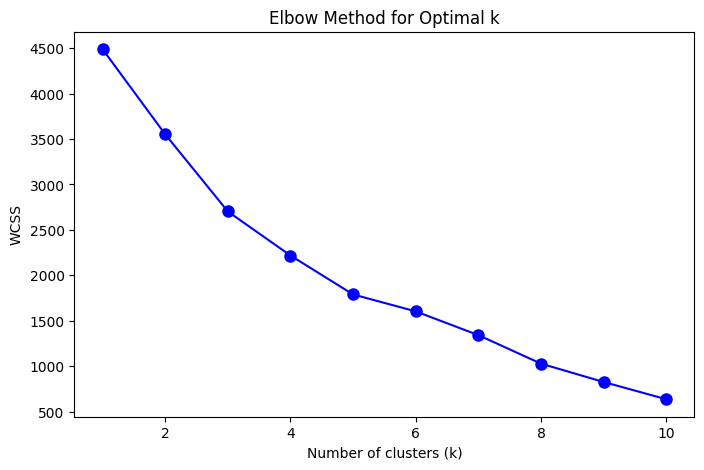

In [ ]:
wcss = []
k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# **10.0 Implement k-means clustering**

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

# **11.0 Extract the labels**

In [ ]:
labels = kmeans.labels_#To get the label

In [ ]:
labels

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
df['Sleep_Disorder_Unsupervised'] = labels

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure,Sleep_Disorder_Unsupervised
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0,2
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0,1
370,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0,1
371,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0,1
372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0,1


In [ ]:
df.head(30)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure,Sleep_Disorder_Unsupervised
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0,2
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2
5,0,28,0,5.9,4,30,8,2,85,3000,140.0,90.0,2
6,0,29,3,6.3,6,40,7,2,82,3500,140.0,90.0,2
7,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0
8,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0
9,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0


In [ ]:
df['Sleep_Disorder_Unsupervised'].unique()

array([2, 0, 1], dtype=int32)

# **12.0 Now we compare with the accual label based on the labeled dataset.**

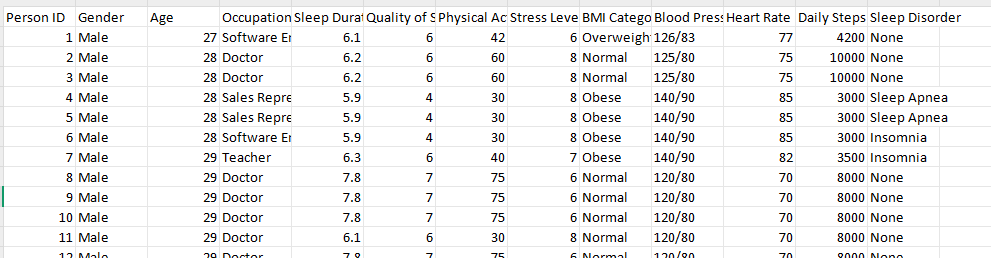

Based on the elbow method for k optimal (graph), it looks like k=3, so the number of label categories is same as the actual supervised data which are also only consist of 3 categories of labels which are None, Sleep Apnea and Insomnia. The 7 consecutive data are not same with the label in Pandas Data Frame, but first data's label, second data's label and third data's label are matching, so we can assume label number 2 in Pandas Data Frame as None(as in supervised dataset). But Overall, the data are not matching.

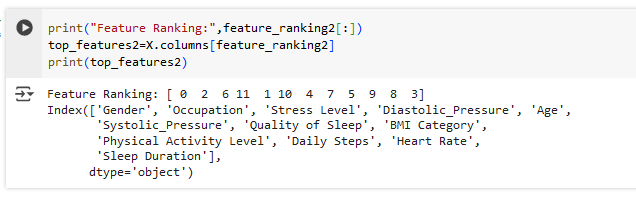

We can try to drop less significant parameter like 'Daily Steps', 'Heart Rate' and 'Sleep Duration'. Based on Laplasian Score, the lesser the value the more important the parameter. Since 'Daily Steps', 'Heart Rate' and 'Sleep Duration' have high value and it's arranged at the back of the array (array is in ascending order), so it's less important to the data.

# 13.0 Uploading another dataset (Supervised). This is the same datset as unsupervised version. Actually, we have both the supervised version dataset and another version is unsupervised version (without target/label). We are going to compare the match between unsupervised version (label) with supervised version (target).We are going to check the accuracy score between the same dataset with label that we got from k-mean clustering and the already available target (in the supervised version of the dataset)

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset_Supervised.csv')

In [ ]:
df2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df2['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

# 14.0 Clone df

In [ ]:
X=df.copy()

# 15.0 Merge Label from df2 to X (df.copy()). Label['Sleep Disorder'] from df2 is the true data (supervised version)

In [ ]:
merged_df=X.join(df2['Sleep Disorder'])

In [ ]:
merged_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure,Sleep_Disorder_Unsupervised,Sleep Disorder
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0,2,NaN
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2,NaN
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2,NaN
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2,Sleep Apnea
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0,1,Sleep Apnea
370,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0,1,Sleep Apnea
371,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0,1,Sleep Apnea
372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0,1,Sleep Apnea


In [ ]:
Sleep_map={
    "Sleep Apnea": 1,
    "Insomnia":2
}
merged_df['Sleep Disorder']=merged_df['Sleep Disorder'].map(Sleep_map)

In [ ]:
merged_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure,Sleep_Disorder_Unsupervised,Sleep Disorder
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0,2,NaN
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2,NaN
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2,NaN
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2,1.0
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2,1.0


# 16.0 change nan to zero (0) and change from float to int

In [ ]:
merged_df['Sleep Disorder']=merged_df['Sleep Disorder'].fillna(0).astype(int)

In [ ]:
merged_df.head(30)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure,Sleep_Disorder_Unsupervised,Sleep Disorder
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0,2,0
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2,0
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,2,0
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2,1
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,2,1
5,0,28,0,5.9,4,30,8,2,85,3000,140.0,90.0,2,2
6,0,29,3,6.3,6,40,7,2,82,3500,140.0,90.0,2,2
7,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0,0
8,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0,0
9,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0,0


# 17.0 Import important Libraries

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

# 18.0 True(from supervised datasets) and Predicted Labels(Unsupervised)

In [ ]:
y_pred=merged_df['Sleep_Disorder_Unsupervised']
y_true=merged_df['Sleep Disorder']

# 19.0 Confusion Matrix

In [ ]:
cm=confusion_matrix(y_true,y_pred)

In [ ]:
cm

array([[170,   7,  42],
       [  6,  59,  13],
       [  6,  32,  39]])

# Based on the confusion matrix 170 samples of Class 0 predicted correctly as Class 0, 6 samples of Class 0 predicted wrongly as Class 1, 6 samples of Class 0 predicted wrongly as Class 2. 59 samples of Class 1 predicted correctly as Class 1. 7 samples of Class 1 predicted wrongly as Class 0.

# Accuracy score is 0.7165775401069518

# **20.0 Use Hungarian matching method to calculate accuracy score**

In [ ]:
row_ind, col_ind=linear_sum_assignment(-cm)
print("Row indices:", row_ind)
print("column indices:",col_ind)

#reassign predicted labels using mapping
new_labels=np.zeros_like(y_pred)

for i, j in zip(col_ind,row_ind):
    new_labels[y_pred==i]=j

print("Aligned predicted labels:", new_labels)

accuracy=accuracy_score(y_true,new_labels)
print("Accuracy:",accuracy)

Row indices: [0 1 2]
column indices: [0 1 2]
Aligned predicted labels: [2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2
 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2
 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy: 0.7165775401069518


# 21.0 Create data frame after reassignment

In [ ]:
merged_df2=pd.DataFrame({
    'True_Label':y_true,
    'Original_Cluster':y_pred,
    'Aligned_Clusters':new_labels
})

print(merged_df2)

     True_Label  Original_Cluster  Aligned_Clusters
0             0                 2                 2
1             0                 2                 2
2             0                 2                 2
3             1                 2                 2
4             1                 2                 2
..          ...               ...               ...
369           1                 1                 1
370           1                 1                 1
371           1                 1                 1
372           1                 1                 1
373           1                 1                 1

[374 rows x 3 columns]


In [ ]:
merged_df2

,True_Label,Original_Cluster,Aligned_Clusters
0,0,2,2
1,0,2,2
2,0,2,2
3,1,2,2
4,1,2,2
...,...,...,...
369,1,1,1
370,1,1,1
371,1,1,1
372,1,1,1


# 22.0 Silhouette_Score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X=df.copy()

In [ ]:
k_means=KMeans(n_clusters=3)
labels=kmeans.fit_predict(X)
score=silhouette_score(X,labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6113401459420412
